# Deep learning from scratch: homework 1

### Haoyang Han hhr8512

### General instructions

Complete the exericse listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.  

### When submitting this homework:

**Make sure you have put your name at the top of each file**
    
**Make sure all output is present in your notebook prior to submission**

**If possible please do not zip your files when uploading to canvas**

---

In [1]:
# import necessary library for this exercise
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

#### <span style="color:#a50e3e;">Exercise 5. </span>   Perform two-class classification on a breast cancer dataset

In this exercise you will repeat the experiment shown in [Section 9.4 of the class notes](https://jermwatt.github.io/mlrefined/blog_posts/8_Linear_regression/8_4_feature_scaling.html) comparing a run of gradient descent on standard and normalized data for two class classification using a real N=8 input breast cancer dataset, [a description of which you can find here](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original).  You should repeat this experiment precisely: including using the same number of steps for each run, the same steplength values and initializations, and by producing the same cost funciton / misclassification history plots for each run of gradient descent.  This dataset is loaded in the cell below.

In [2]:
# data input
data = np.loadtxt('breast_cancer_data.csv',delimiter = ',')

# get input and output of dataset
x = data[:,:-1].T
y = data[:,-1:] 




In [3]:
# functions given in 9.1.2: Softmax cost function

# compute linear combination of input point
def model(x,w):
    # tack a 1 onto the top of each input point all at once
    o = np.ones((1,np.shape(x)[1]))
    x = np.vstack((o,x))
    
    # compute linear combination and return
    a = np.dot(x.T,w)
    return a

# the convex softmax cost function
def softmax(w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(len(y))

In [4]:
# function given in 9.1.4: Counting cost

# the counting cost function
def counting_cost(w):
    cost = np.sum((np.sign(model(x,w)) - y)**2)
    return 0.25*cost 

In [5]:
# and also remember to add gradient-descent function here


# This is a gradient descent function

# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import value_and_grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha_choice,max_its,w):
    # compute the gradient function of our input function - note this is a function too
    # that - when evaluated - returns both the gradient and function evaluations (remember
    # as discussed in Chapter 3 we always ge the function evaluation 'for free' when we use
    # an Automatic Differntiator to evaluate the gradient)
    gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)

        # take gradient descent step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(w)
    # compute final cost function value via g itself (since we aren't computing 
    # the gradient at the final step we don't get the final cost function value 
    # via the Automatic Differentiatoor) 
    cost_history.append(g(w))  
    return weight_history,cost_history

In [6]:
# load in cost function

#softmax = softmax(w)
#counting_cost = counting_cost(w)

# load in an optimizer
g = softmax; w = 0.1*np.random.randn(x.shape[0]+1,1); max_its = 100; alpha_choice = 10**(-1);
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w)
count_history_1 = [counting_cost(v) for v in weight_history_1]

In [7]:
# Nomorlization
x = (x - np.mean(x))/np.std(x)

In [8]:
# load in cost function

#softmax = softmax(w)
#counting_cost = counting_cost(w)

# load in an optimizer
g = softmax; w = 0.1*np.random.randn(x.shape[0]+1,1); max_its = 100; alpha_choice = 10**(-1);
weight_history_2,cost_history_2 = gradient_descent(g,alpha_choice,max_its,w)
count_history_2 = [counting_cost(v) for v in weight_history_1]


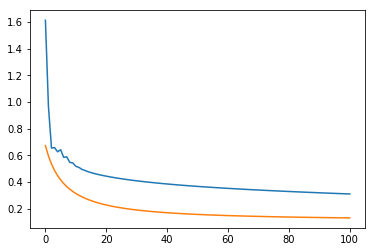

In [9]:
plt.plot(cost_history_1)
plt.plot(cost_history_2)
plt.show()

Note that you can find effecient `Python` implementations of both the softmax cost function [in Section 9.1.2](https://jermwatt.github.io/mlrefined/blog_posts/9_Linear_twoclass_classification/9_1_Logistic_regression.html) and the counting cost (for producing the number of misclassifications) [in Section 9.1.4](https://jermwatt.github.io/mlrefined/blog_posts/9_Linear_twoclass_classification/9_1_Logistic_regression.html) of the course notes.  Use these to produce both a plot of the cost function and misclassification count history for each run of gradient descent as shown in the example.